In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
# from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
from pylab import rcParams
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 
from scipy.cluster.hierarchy import linkage, cut_tree
%matplotlib inline
rcParams['figure.figsize'] = (14,10)
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [45]:
z = pd.read_pickle("/content/drive/MyDrive/CHINA_DATASET/brofinalll.plk")

In [46]:
z.head()

,station,real_dates,pm25,latitude,longitude,states
0,"Adarsh Nagar, Jaipur - RSPCB",2018-01-01,61.342917,26.902909,75.836858,Rajasthan
1,"Adarsh Nagar, Jaipur - RSPCB",2018-01-02,68.528125,26.902909,75.836858,Rajasthan
2,"Adarsh Nagar, Jaipur - RSPCB",2018-01-03,88.325833,26.902909,75.836858,Rajasthan
3,"Adarsh Nagar, Jaipur - RSPCB",2018-01-04,68.783983,26.902909,75.836858,Rajasthan
4,"Adarsh Nagar, Jaipur - RSPCB",2018-01-05,63.135110,26.902909,75.836858,Rajasthan


In [47]:
p =z.groupby(['station'], as_index=False)['pm25'].mean()

In [48]:
lat_lon = pd.read_excel("/content/drive/MyDrive/CHINA_INDIA_VARIABLES/states_latitude_longitude.xlsx")
latitude = []
longitude = []
states = []
for i in p['station']:
  for j in range(len(lat_lon['station_name'])):
    if lat_lon['station_name'][j] == i: 
      states.append(lat_lon["State"][j])
      latitude.append(lat_lon["latitude"][j])
      longitude.append(lat_lon["longitude"][j])
p["latitude"] = latitude
p["longitude"]= longitude
p["state"] = states

In [80]:
def custom_metric(central_1, central_2, weight=10):
    lat1, lng1, pow1 = central_1
    lat2, lng2, pow2 = central_2

    lat1, lat2, lng1, lng2 = np.deg2rad(np.asarray([lat1, lat2, lng1, lng2]))

    dlat = lat2 - lat1
    dlng = lng2 - lng1
    
    h = (1 - np.cos(dlat))/2. + np.cos(lat1)*np.cos(lat2)*(1 - np.cos(dlng))/2.
    km = 2*6371*np.arcsin(np.sqrt(h))
    
    MW = np.abs(pow2 - pow1)
    
    return km + weight*MW

data = np.vstack([p.latitude, p.longitude, p.pm25]).T
Z = linkage(data, method='average', metric=custom_metric)
y = cut_tree(Z, 2).flatten()
p['label'] = y

Silhouette Score(n=4): 0.17698108777814173


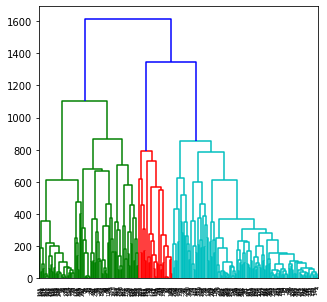

In [81]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(5, 5))
dendrogram(Z)
plt.savefig("x3.png")
print(f'Silhouette Score(n=4): {silhouette_score(data,y)}')

In [82]:
p =p.sort_values(by="station")

In [83]:
z = np.load("/content/drive/MyDrive/CHINA_DATASET/INDIA_FINAL_COLAB_PRO.npy")

In [84]:
label_0 = []
label_1 = []
# label_2 = []
# label_3 = []
# label_4 = []
for i in range(len(p)):
  if(p.iloc[i,5]==0):
    label_0.append(i)
  elif(p.iloc[i,5]==1):
    label_1.append(i)
  # elif(p.iloc[i,5]==2):
  #   label_2.append(i)
  # elif(p.iloc[i,5]==3):
  #   label_3.append(i)

In [85]:
label_00 = z[:,label_0,:]
label_01 = z[:,label_1,:]
# label_02 = z[:,label_2,:]
# label_03 = z[:,label_3,:]

In [86]:
np.save("/content/drive/MyDrive/CLUSTER/HIERARCHICAL/DATA/label0.npy",label_00)
np.save("/content/drive/MyDrive/CLUSTER/HIERARCHICAL/DATA/label1.npy",label_01)
# np.save("/content/drive/MyDrive/HONOURS/DATA/DBSCAN/DATA/label2.npy",label_02)
# np.save("/content/drive/MyDrive/HONOURS/DATA/DBSCAN/DATA/label3.npy",label_03)

In [87]:
np.load.__defaults__=(None, True, True, 'ASCII')
k = np.load("/content/drive/MyDrive/cleaned data/altitude.npy")
np.load.__defaults__=(None, False, True, 'ASCII')

In [88]:
label_00 = z[label_0]
label_01 = z[label_1]
# label_02 = z[label_2]
# label_03 = z[label_3]

In [89]:
np.save("/content/drive/MyDrive/CLUSTER/HIERARCHICAL/ALT/label0.npy",label_00)
np.save("/content/drive/MyDrive/CLUSTER/HIERARCHICAL/ALT/label1.npy",label_01)
# np.save("/content/drive/MyDrive/HONOURS/DATA/DBSCAN/ATITUDE/label2.npy",label_02)
# np.save("/content/drive/MyDrive/HONOURS/DATA/DBSCAN/ATITUDE/label3.npy",label_03)

In [90]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/cleaned data/latitude_longitude.txt', delimiter = "\t",header=None)

In [91]:
label_00 = df.iloc[label_0,:]
label_01 = df.iloc[label_1,:]
# label_02 = df.iloc[label_2,:]
# label_03 = df.iloc[label_3,:]

In [92]:
label_00 = label_00.reset_index()
label_00 = label_00.iloc[:,[2,3,4]]
label_01 = label_01.reset_index()
label_01 = label_01.iloc[:,[2,3,4]]
# label_02 = label_02.reset_index()
# label_02 = label_02.iloc[:,[2,3,4]]
# label_03 = label_03.reset_index()
# label_03 = label_03.iloc[:,[2,3,4]]

In [93]:
label_00.to_csv(r'/content/drive/MyDrive/CLUSTER/HIERARCHICAL/LAT/label0.csv')
label_01.to_csv(r'/content/drive/MyDrive/CLUSTER/HIERARCHICAL/LAT/label1.csv')
# label_02.to_csv(r'/content/drive/MyDrive/HONOURS/DATA/DBSCAN/LAT/label2.csv')
# label_03.to_csv(r'/label3.csv')

In [ ]:
label_00.to_csv(r'/content/drive/MyDrive/CLUSTER/lat_lon_label0.csv', header=None, index=True, sep=',', mode='a')
label_01.to_csv(r'/content/drive/MyDrive/CLUSTER/lat_lon_label1.csv', header=None, index=True, sep=',', mode='a')
label_02.to_csv(r'/content/drive/MyDrive/CLUSTER/lat_lon_label2.csv', header=None, index=True, sep=',', mode='a')
label_03.to_csv(r'/content/drive/MyDrive/CLUSTER/lat_lon_label3.csv', header=None, index=True, sep=',', mode='a')

In [ ]:
np.save("/content/drive/MyDrive/CLUSTER/k_means_1.npy",x)

In [94]:
p.groupby('label')['label'].count()

label
0    166
1     92
Name: label, dtype: int64

In [ ]:

x = []
for i in range(len(p)):
    if p.iloc[i,5]==0:
      x.append(z[:,i,:])

In [ ]:
z[:,1,:].shape

(8761, 9)

In [ ]:
r.shape

(53, 8761, 9)

In [ ]:
r = np.array(x)

In [ ]:
f = np.array(q)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [ ]:
f.shape

(53, 2)

In [ ]:
53+48+34+123

258

In [ ]:
def x(a,b,c,d):
  return (a*53+b*121+c*53+d*31)/258

In [ ]:
x(0.2670,0.2200,0.2546,0.2031)

0.23473217054263568